## Full Pipeline

This is an improved pipeline from the initial version created in assignment 2. It depends on python modules containing functions for various phases in the pipeline: explore, clean, features, model. The config file contains all constants that the user may define when running the script. 

In [ ]:
import sys
import pandas as pd
import numpy as np
from config import *
from pipeline import *
from explore import *
from cleaning import *
from features import *
from model import *
from sklearn.cross_validation import train_test_split
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


'Shape:'

(150000, 12)

'Data types:'

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

'Summary statistics:'

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

             zipcode  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean    60648.810013                              0.421033     353.005076   
std        56.748197                              4.192781    2037.818523   
min     60601.000000                              0.000000       0.000000   
25%     60625.000000                              0.000000       0.175074   
50%     60629.000000                              0.000000       0.366508   
75%     60644.000000                              0.000000       0.868254   
max     60804.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.202690e+05                    150000.000000   
mean    6.670221e+03                         8.452760   
std     1.438467e+04                         5.145951   
min     0.000000e+00                         0.000000   
25%     3.400000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.249000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

'Percent null per column:'

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
zipcode                                 0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

'Proportion of'

'SeriousDlqin2yrs'

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

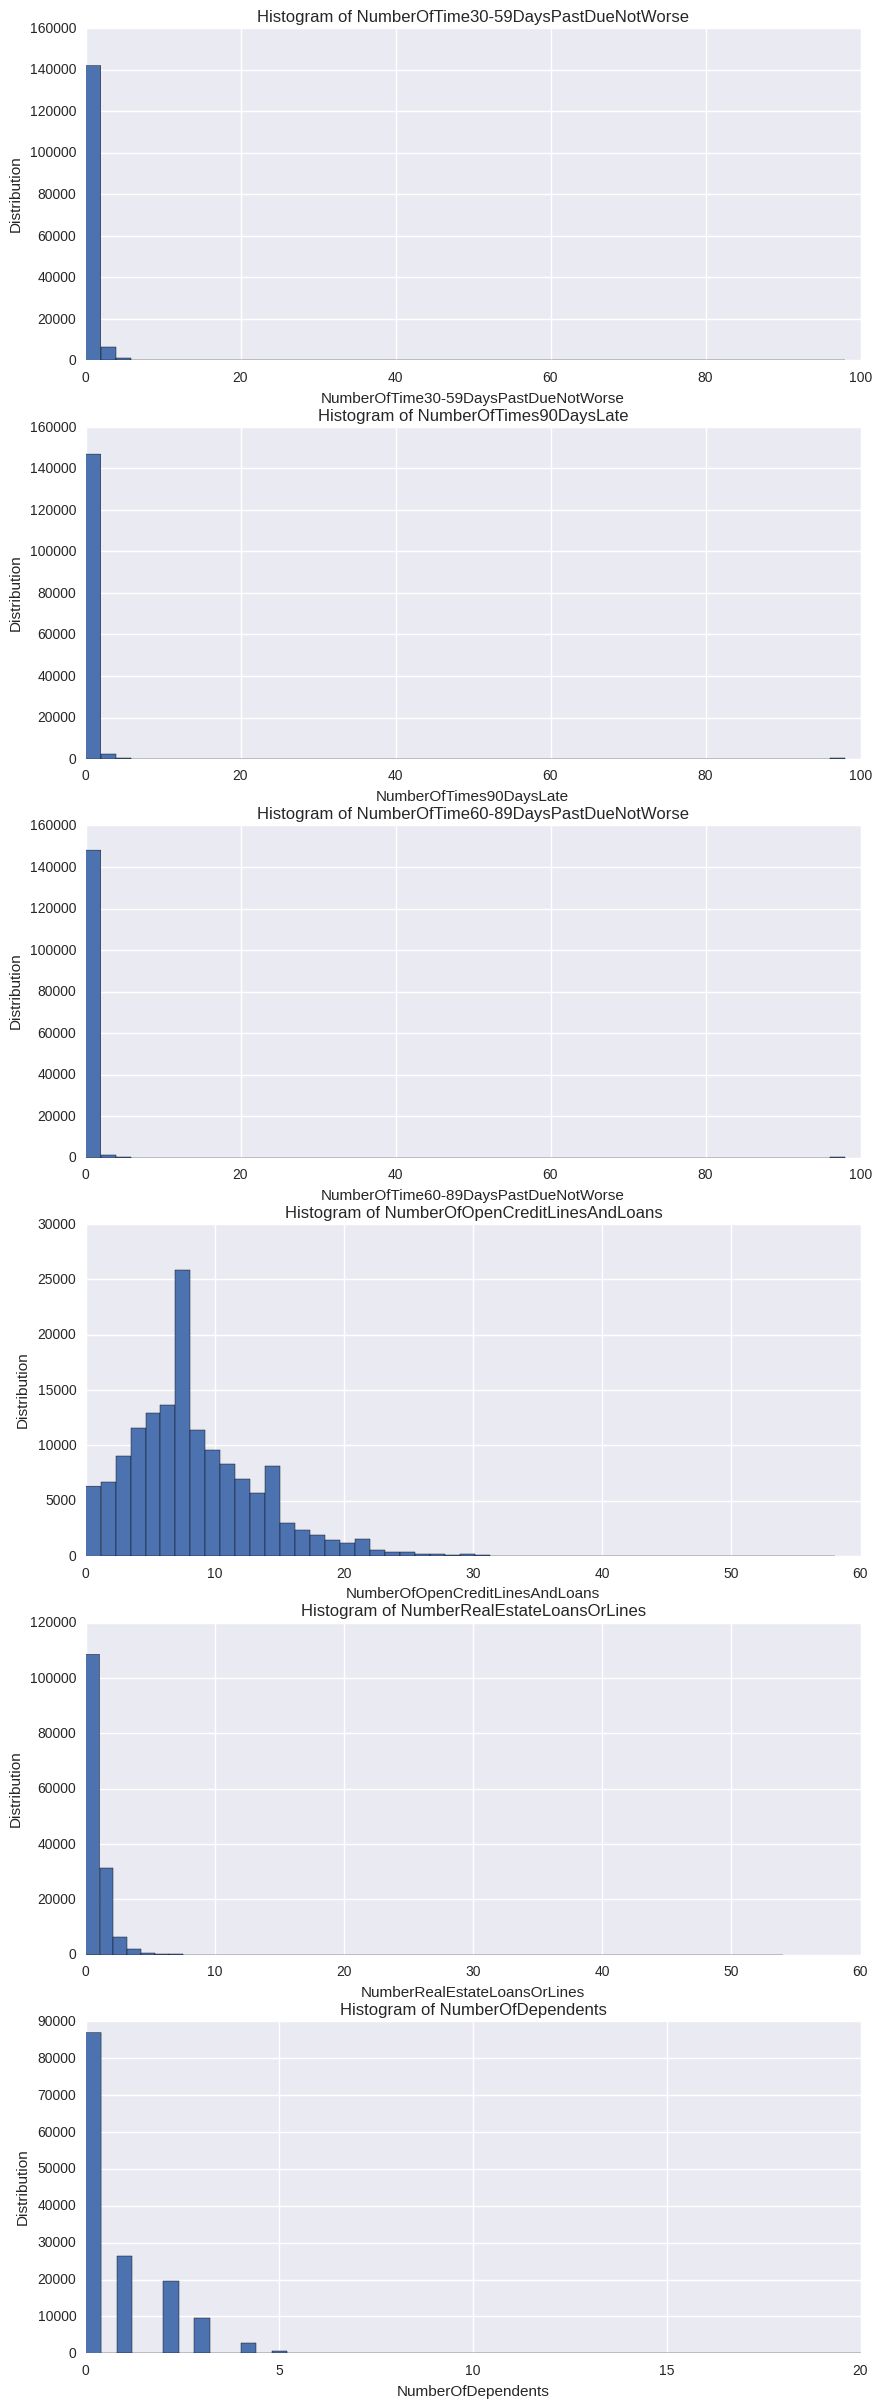

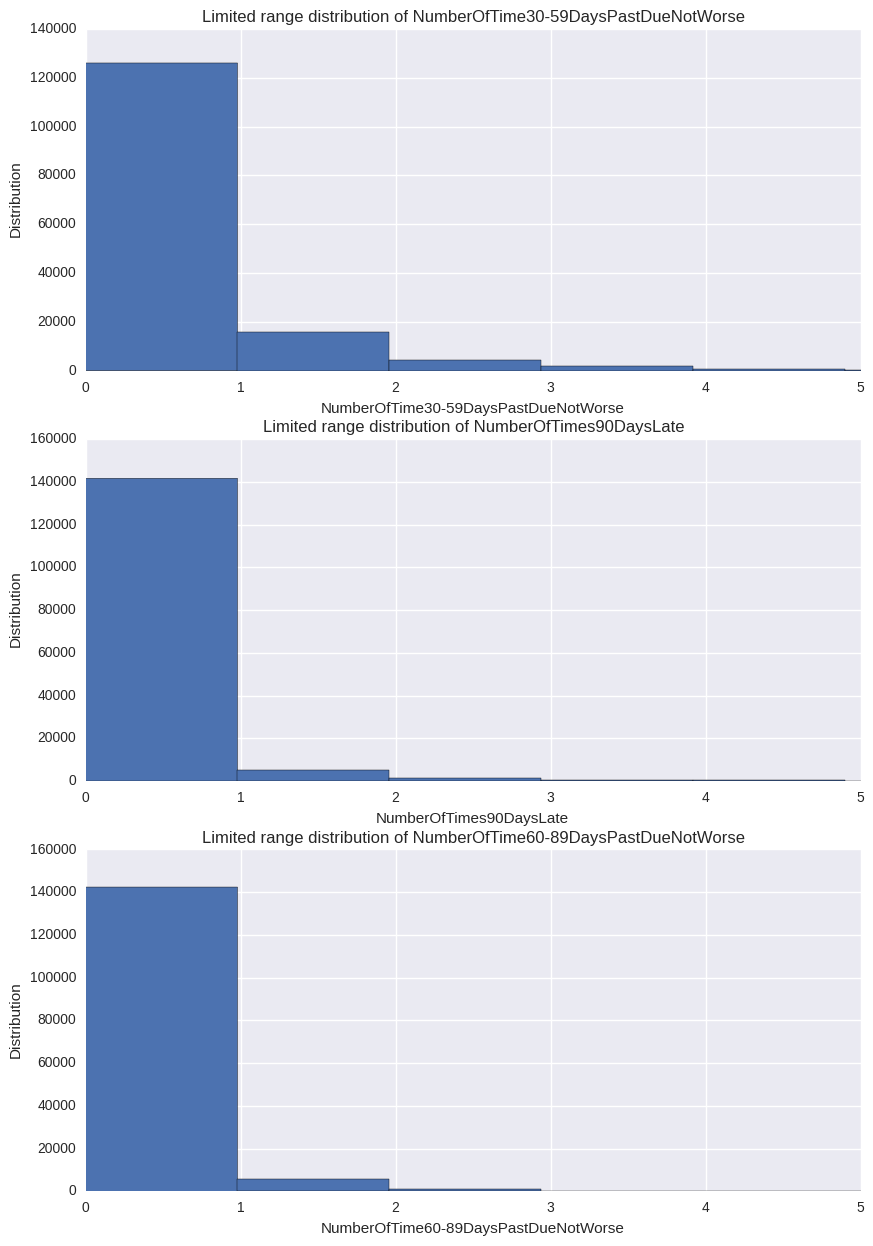

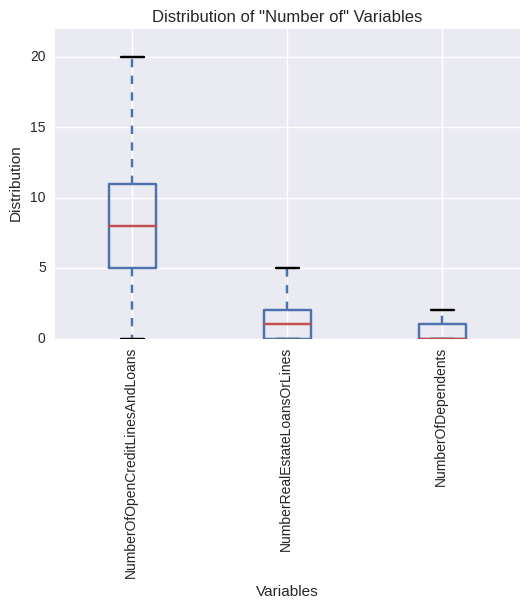

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


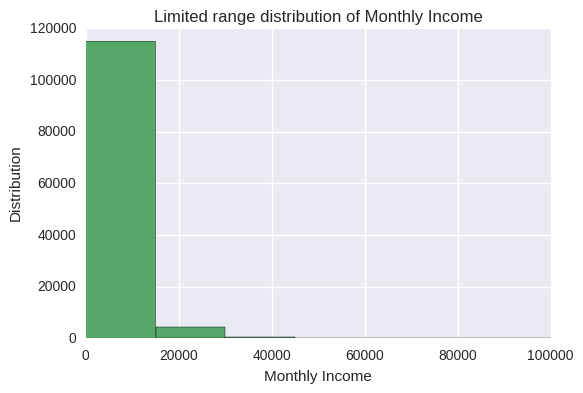

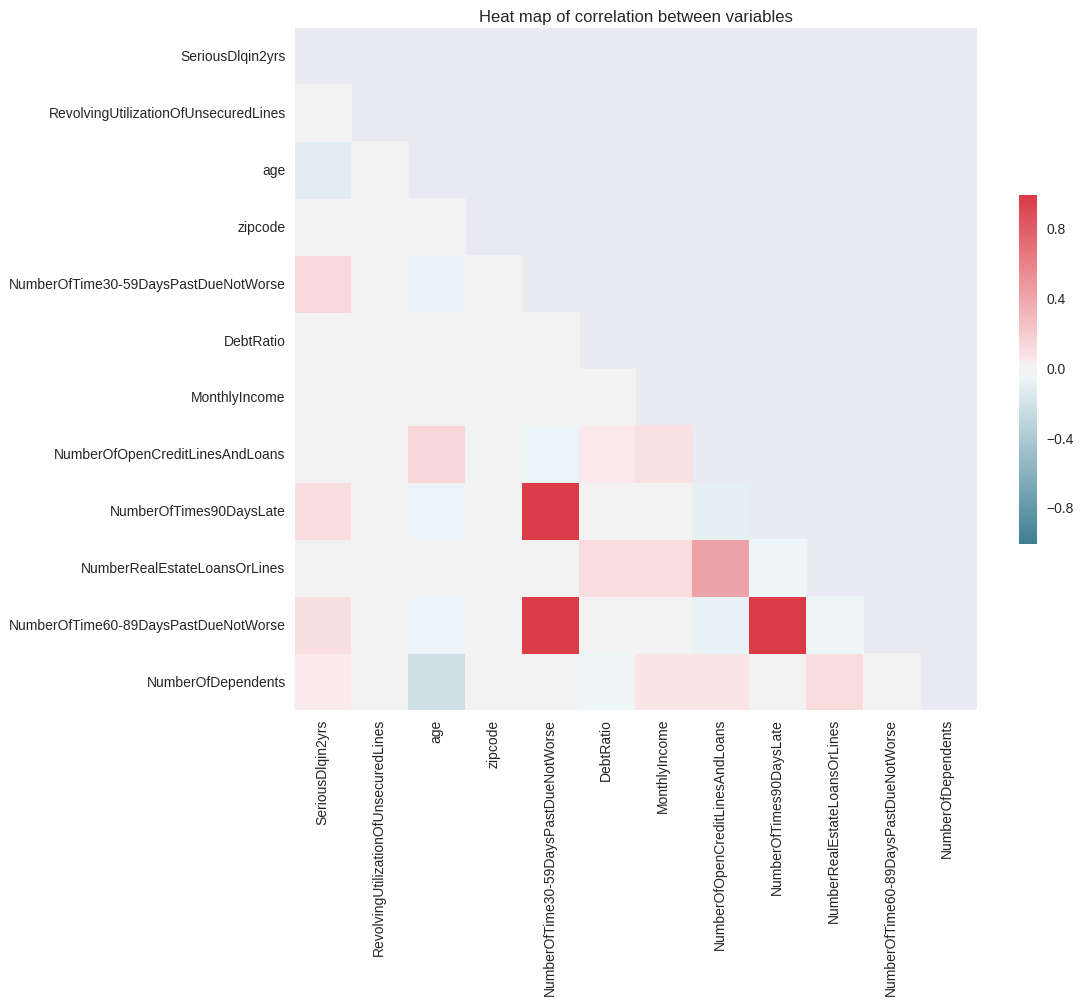

In [ ]:
df = pd.read_csv('credit-data.csv', index_col=INDEX_COL, sep=SEPERATOR)
results, y_test = pipeline(df)

## Comparison Table

The results dataframe below compares the performance of the different classifiers, across all parameter combinations and all evaluation metrics.

The evaluation methods used include:
* Precision (cutoff=5,10,20)
* Accuracy (cutoff=5,10,20)
* Recall (cutoff=5,10,20)
* Runtime
* AUC

In [ ]:
results

## Precision Recall Curves:
Looping through results dataframe and plotting precision-recall curve for each set of parameters


In [ ]:
for index, row in results.iterrows():
    plot_precision_recall_n(y_test,row['y_pred_probs'],row['clf'])